# Introduction

## Challenge Test


# Image Classification:

Image classification is the task of assigning to an image a label from a predefined set of
categories. A CNN [1] is intended to identify visual forms from images with least computation [2]. In the last few years, we saw a rapid progress in visual image processing systems, mostly due to advances of deep convolutional neural networks.



1. Y. LeCun, L. Bottu, Y. Bengio, Gradient-based learning applied to document recognition, Proceedings of the
IEEE 86 (11) (1998) 2278–2324, https://doi.org/10.1109/5.726791.
2. Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton, Imagenet classification with deep convolutional neural net-works, in: NIPS’12 Proceedings of the 25th InternationalConference on Neural Information ProcessingSystem,
vol. 1, 2012, pp. 1097–1105, arXiv:1311.2901.

# The properties of the dataset:

DataSet consistst of images of faces of different persons with certain characteristics. The task is to train a model able to predict whether certain image possess required chacteristics (encoded by the output labels) or not.
There is imbalance between the sample images in the dataset for men and women.

### Downloading the Data: 

DataSet is with the Email


After unzipping the file, you have three folders: train, validation, test and two text files relating to the train and validation labels. You can use both training and validation data for training and validation your model.

### Training and Validation Data

***Training Data:*** The "train" folder contains 1000 face images numbered from 000000 to 000999. These are color images in .jpg format with size of 80x80 pixels.

***Training Labels:*** The file named "label_train.txt" contains two columns. The first column list the 1000 labels (0 or 1) that are used to train your model. The second columns lists the corresponding binary representation of genders (0: woman, 1: Man)

***Validation Data:*** The "validation" folder contains 500 face images numbered from 000000 to 000500. These are color images in .jpg format with size of 80x80 pixels.

***Validation Labels:*** The file named "label_validation.txt" contains two columns. The first column list the 500 labels (0 or 1) that are used to validate your model. The second columns lists the corresponding binary representation of genders (0: woman, 1: Man)

### Test Data

 The "test" folder contains 500 face images numbered from 000000 to 000499. These are color images in .jpg format with size of 80x80 pixels.

### Libraryes imported

In [ ]:
#To manipulate data and folder on PC
import glob, os, re

# To manipulate images
import cv2

# To process data
import numpy as np
import pandas as pd

# To implement CNN
import keras
from keras import models, layers, optimizers
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, roc_auc_score
import tensorflow as tf

# To verify that Tensorflow use the GPU instead the CPU to obtain more speed during the computation time fof the training.
print(tf.config.list_physical_devices('GPU'))

# to show graphics and images
import matplotlib.pyplot as plt 


2023-06-06 09:52:25.540739: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 09:52:28.462874: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-06 09:52:28.488463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Investigate the data

We want to understand the image set. We want know the number of image in train set, the shape of the images and printing a random image in the folder. The same for Validation and test folders. Finally we verify that all images have the same shape and we want know if exist identical images in the same folder and between differents folder.

First of all we need create 2 subfolders in train and Validation, class_0 and class_1 where we put the image in class_0 if the label is 0 in label_train.txt and 1 instead.

In [3]:

dir_path = "DataSet/"

# Reading the label of train
# read text file into pandas DataFrame, we don't considered the header of the txt because it doesn't exist
df = pd.read_csv(dir_path+"label_train.txt", sep=" ", header = None, index_col=False)
label_train = df[0]
sex_train = df[1]
#print(label_train)
#print(sex_train)

df = pd.read_csv(dir_path+"label_validation.txt", sep=" ", header = None, index_col=False)
label_validation = df[0]
sex_validation = df[1]

How many man and woman in train and validation?

In [4]:
# NUmber of men and women in image set
nb_sexe = sex_train.value_counts()
print("TRAIN set")
print("Number of women : ",nb_sexe[0])
print("Number of man : ",nb_sexe[1])
print("Ratio : ",nb_sexe[0]/nb_sexe[1])
print("")

# NUmber of men and women in image set
nb_sexe = sex_validation.value_counts()
print("VALIDATION set")
print("Number of women : ",nb_sexe[0])
print("Number of man : ",nb_sexe[1])
print("Ratio : ",nb_sexe[0]/nb_sexe[1])


TRAIN set
Number of women :  581
Number of man :  419
Ratio :  1.3866348448687351

VALIDATION set
Number of women :  286
Number of man :  214
Ratio :  1.3364485981308412


['class_0', 'class_1']


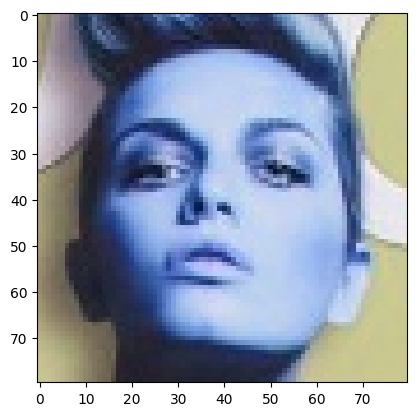

[[[162 156 119]
  [151 148 117]
  [138 134 115]
  ...
  [203 202 141]
  [204 200 147]
  [201 198 147]]

 [[162 156 121]
  [153 149 120]
  [136 134 116]
  ...
  [204 203 142]
  [202 201 145]
  [202 199 148]]

 [[157 152 119]
  [152 148 120]
  [135 132 117]
  ...
  [201 200 139]
  [204 203 147]
  [200 200 146]]

 ...

 [[199 196 145]
  [198 195 144]
  [197 192 143]
  ...
  [201 200 144]
  [201 200 144]
  [201 200 144]]

 [[198 198 144]
  [198 197 146]
  [198 194 145]
  ...
  [201 200 142]
  [201 200 144]
  [199 200 144]]

 [[197 197 143]
  [197 196 145]
  [199 195 146]
  ...
  [201 200 142]
  [201 200 144]
  [199 200 144]]]
(80, 80, 3)


In [5]:
# creates directory and categories
DATADIR = 'DataSet/train/class_0'

data_directory = 'DataSet/train/'
directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
print(directories)

# iterates through all images in directory
for img in os.listdir(DATADIR):
    # converts image to array and greyscale
    img_array = cv2.imread(os.path.join(DATADIR,img))#, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array)#, cmap="gray")
    plt.show() #one image should print
    break

print(img_array) #print array to check img_array
print(img_array.shape)
input_shape = img_array.shape
image_size = input_shape[:2]

In [6]:
# reshape images
#IMG_SIZE = image_size[1] #pixel size
#new_array = cv2.resize(img_array, image_size)
#plt.imshow(new_array, cmap = 'gray')
#plt.show()

# training data
"""
training_data = []
def create_training_data():
    # iterates through all images in directory
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                # converts image to array and greyscale
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, image_size)
                training_data.append([new_array, class_num])
            except Exception:
                #any images that are broken will not be included
                pass

create_training_data()
"""
# print training length
#print(len(training_data))


#%%
# shuffle training data
#import random
#random.shuffle(training_data)
#for sample in training_data[:10]:
#    print(sample[1])


'\ntraining_data = []\ndef create_training_data():\n    # iterates through all images in directory\n    for category in CATEGORIES:\n        path = os.path.join(DATADIR, category)\n        class_num = CATEGORIES.index(category)\n        for img in os.listdir(path):\n            try:\n                # converts image to array and greyscale\n                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)\n                new_array = cv2.resize(img_array, image_size)\n                training_data.append([new_array, class_num])\n            except Exception:\n                #any images that are broken will not be included\n                pass\n\ncreate_training_data()\n'

### Data Preparation

Move image in the subfolders representing the label

In [109]:
import shutil

list_folders = ["train/","Validation/"]

for name_folder in list_folders:
    # Source path
    source = dir_path+name_folder
    
    # Destination path
    destination_0 = source+"0"
    destination_1 = source+"1"

    if os.path.exists(destination_0) == False:
        os.mkdir(destination_0)
    if os.path.exists(destination_1) == False:
        os.mkdir(destination_1)
    
    # Move the content of source to destination
    file_list = glob.glob(source+"/*.jpg")

    for img in file_list:
        index = int(os.path.basename(img).split('/')[-1].split(".")[0])
        if label_train[index] == 0 :
            shutil.move(img, destination_0)
        else :  
            shutil.move(img, destination_1)


### Building your Network

We build a CNN adopting a pre-trained architecture proposed by Tensorflow library.

In [99]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2))
model.add(layers.Activation('sigmoid'))

model.summary()

opt = keras.optimizers.Adam(learning_rate=1e-4)
loss=tf.keras.losses.BinaryCrossentropy(from_logits=False)
loss=tf.keras.losses.MeanSquaredError()


model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 activation_84 (Activation)  (None, 78, 78, 32)        0         
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 activation_85 (Activation)  (None, 37, 37, 32)        0         
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                

### Data Preprocessing

We prepare data set for train and validation in a valid format for tensorflow framework. We decide to select train with batch having size of 32 images, we take all the pixels of the images (80x80).

In the output we obtain the number of files in the folder and tha number of labels (in our case there are 2 categories).

In [100]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="DataSet/train/",
    labels='inferred',
    label_mode='binary',
    batch_size=32           ,
    image_size=image_size)

Found 1000 files belonging to 2 classes.


In [101]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory='DataSet/Validation/',
    labels='inferred',
    label_mode='binary',
    batch_size=16,
    image_size=image_size)

Found 500 files belonging to 2 classes.


### Training your Model

Now we are ready to train a model with the train and validation data.

In [102]:
history = model.fit(train_ds, epochs=70, validation_data=validation_ds)


Epoch 1/70


2023-06-06 12:28:48.624466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1000]
	 [[{{node Placeholder/_0}}]]
2023-06-06 12:28:48.625278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1000]
	 [[{{node Placeholder/_0}}]]


31/32 [============================>.] - ETA: 0s - loss: 0.4891 - accuracy: 0.4929

2023-06-06 12:28:49.528851: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [500]
	 [[{{node Placeholder/_4}}]]
2023-06-06 12:28:49.529599: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [500]
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 1s 20ms/step - loss: 0.4897 - accuracy: 0.4920 - val_loss: 0.5140 - val_accuracy: 0.5240
Epoch 2/70
32/32 [==============================] - 1s 15ms/step - loss: 0.4895 - accuracy: 0.4780 - val_loss: 0.5000 - val_accuracy: 0.4860
Epoch 3/70
32/32 [==============================] - 1s 15ms/step - loss: 0.4776 - accuracy: 0.4830 - val_loss: 0.5000 - val_accuracy: 0.4860
Epoch 4/70
32/32 [==============================] - 1s 16ms/step - loss: 0.4966 - accuracy: 0.4840 - val_loss: 0.5000 - val_accuracy: 0.4860
Epoch 5/70
32/32 [==============================] - 1s 16ms/step - loss: 0.4839 - accuracy: 0.4800 - val_loss: 0.4998 - val_accuracy: 0.4860
Epoch 6/70
32/32 [==============================] - 1s 15ms/step - loss: 0.4805 - accuracy: 0.4760 - val_loss: 0.4983 - val_accuracy: 0.4860
Epoch 7/70
32/32 [==============================] - 1s 16ms/step - loss: 0.4864 - accuracy: 0.4880 - val_loss: 0.4854 - val_accuracy: 0.4860
Epoch 8/70
32/32 [======

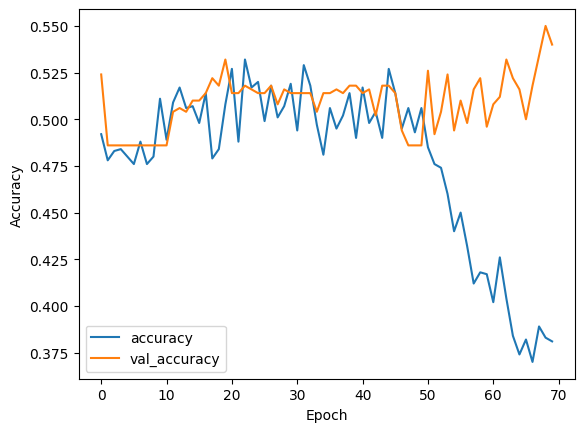

In [103]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

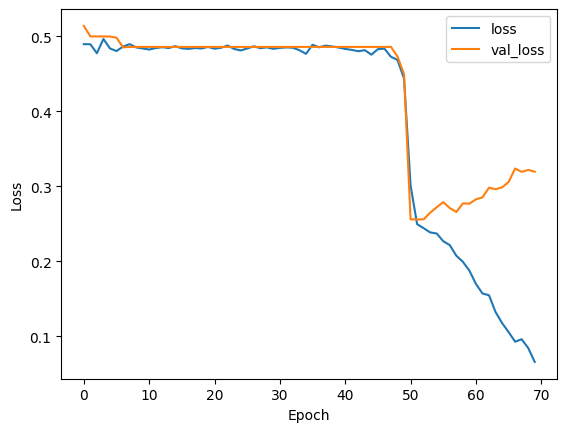

In [104]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [106]:
model2 = tf.keras.applications.ResNet50(weights=None, input_shape=input_shape, classes=2)
model2.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=opt, metrics=['accuracy'])
history2 = model2.fit(train_ds, epochs=30, validation_data=validation_ds)

Epoch 1/30


2023-06-06 12:36:47.424991: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:306] gpu_async_0 cuMemAllocAsync failed to allocate 2435055616 bytes: CUDA error: out of memory (CUDA_ERROR_OUT_OF_MEMORY)
 Reported by CUDA: Free memory/Total memory: 97452032/4225695744
2023-06-06 12:36:47.425024: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:311] Stats: Limit:                      2773549056
InUse:                      1061526793
MaxInUse:                   2342030729
NumAllocs:                    13970701
MaxAllocSize:               1300234240
Reserved:                            0
PeakReserved:                        0
LargestFreeBlock:                    0

2023-06-06 12:36:47.425094: E tensorflow/compiler/xla/stream_executor/gpu/gpu_cudamallocasync_allocator.cc:63] Histogram of current allocation: (allocation_size_in_bytes, nb_allocation_of_that_sizes), ...;
2023-06-06 12:36:47.425099: E tensorflow/compiler/xla/stream_execut

32/32 [==============================] - 14s 211ms/step - loss: 0.4725 - accuracy: 0.4740 - val_loss: 0.5000 - val_accuracy: 0.5140
Epoch 2/30
32/32 [==============================] - 6s 186ms/step - loss: 0.3862 - accuracy: 0.5030 - val_loss: 0.4939 - val_accuracy: 0.5140
Epoch 3/30
32/32 [==============================] - 6s 185ms/step - loss: 0.2895 - accuracy: 0.4710 - val_loss: 0.3275 - val_accuracy: 0.5140
Epoch 4/30
32/32 [==============================] - 6s 183ms/step - loss: 0.2722 - accuracy: 0.5010 - val_loss: 0.2528 - val_accuracy: 0.5140
Epoch 5/30
32/32 [==============================] - 6s 185ms/step - loss: 0.2659 - accuracy: 0.5090 - val_loss: 0.2505 - val_accuracy: 0.5140
Epoch 6/30
32/32 [==============================] - 6s 191ms/step - loss: 0.2658 - accuracy: 0.4850 - val_loss: 0.2514 - val_accuracy: 0.5140
Epoch 7/30
32/32 [==============================] - 6s 190ms/step - loss: 0.2651 - accuracy: 0.5160 - val_loss: 0.2507 - val_accuracy: 0.4860
Epoch 8/30
32/32

In [117]:
test_loss, test_acc = model.evaluate(train_ds, verbose=2)
test_loss, test_acc = model.evaluate(validation_ds, verbose=2)

test_loss, test_acc = model2.evaluate(train_ds, verbose=2)
test_loss, test_acc = model2.evaluate(validation_ds, verbose=2)

from sklearn.metrics import confusion_matrix

y_true = label_validation
y_pred = model.predict(validation_ds)
confusion_matrix(y_true, y_pred)

32/32 - 0s - loss: 0.0445 - accuracy: 0.2060 - 186ms/epoch - 6ms/step
32/32 - 0s - loss: 0.3195 - accuracy: 0.5400 - 127ms/epoch - 4ms/step
32/32 - 1s - loss: 0.2651 - accuracy: 0.4830 - 1s/epoch - 42ms/step
32/32 - 1s - loss: 0.2619 - accuracy: 0.4820 - 906ms/epoch - 28ms/step
32/32 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

### Accuracy by gender for Validation DataSet

To obtain the accuracy by gender we need create dataset for Validation including images divided in 2 subfolders, one for women and one for man.

In [25]:

name_folder = "Validation/"
# Source path
source = dir_path+name_folder
new_source = dir_path+"Validation_with_sex/"
if os.path.exists(new_source) == False:
    os.mkdir(nex_source)


# Destination path
destination_0 = dir_path+name_folder+"class_0"
destination_1 = dir_path+name_folder+"class_1"

if os.path.exists(destination_0) == False:
    os.mkdir(destination_0)
if os.path.exists(destination_1) == False:
    os.mkdir(destination_1)


file_list = glob.glob(source+"/*.jpg")

# Move the content of source to destination
for img in file_list:
    index = int(os.path.basename(img).split('/')[-1].split(".")[0])
    if label_train[index] == 0 :
        shutil.move(img, destination_0)
    else :  
        shutil.move(img, destination_1)

32/32 - 0s - loss: 0.1011 - accuracy: 0.9310 - 163ms/epoch - 5ms/step
16/16 - 0s - loss: 0.2777 - accuracy: 0.5260 - 103ms/epoch - 6ms/step


In [108]:
validation0_ds = keras.utils.image_dataset_from_directory(
    directory='DataSet/Validation/0',
    labels='inferred',
    label_mode='binary',
    batch_size=16,
    image_size=image_size)

test_loss, test_acc = model.evaluate(validation0_ds, verbose=2)


validation1_ds = keras.utils.image_dataset_from_directory(
    directory='DataSet/Validation/1',
    labels='inferred',
    label_mode='binary',
    batch_size=16,
    image_size=image_size)

test_loss, test_acc = model.evaluate(validation1_ds, verbose=2)

Found 0 files belonging to 0 classes.


ValueError: When passing `label_mode="binary"`, there must be exactly 2 class_names. Received: class_names=[]

### Testing your Model

In [41]:
# test data
test_data = keras.utils.image_dataset_from_directory(
    directory='DataSet/test/',
    labels=None,
    label_mode=None,
    batch_size=8,
    image_size=image_size)

# shuffle training data
import random
random.shuffle(test_data)
print(test_data.size)
print(test_data[0].shape)
preds = model.predict(test_data[0])
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
#print('Predicted:', tf.decode_predictions(preds, top=3)[0])

Found 500 files belonging to 1 classes.


TypeError: '_BatchDataset' object is not subscriptable

### Preparing your file for Submission